# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" + "&appid=" + weather_api_key
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # except Exception as E:
    #     print(E)          
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | vorkuta
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | saudarkrokur
Processing Record 14 of Set 1 | mahibadhoo
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | dakhla
Processing Record 21 of Set 1 | salalah
Processing Record 22 of Set 1 | charters towers
Pr

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,17.38,58,20,4.12,GB,1683644734
1,port-aux-francais,-49.3500,70.2167,5.48,92,100,6.57,TF,1683644734
2,margaret river,-33.9500,115.0667,18.73,69,4,9.17,AU,1683644735
3,blackmans bay,-43.0167,147.3167,10.96,79,87,4.98,AU,1683644735
4,bethel,41.3712,-73.4140,18.43,37,0,2.06,US,1683644735


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,17.38,58,20,4.12,GB,1683644734
1,port-aux-francais,-49.3500,70.2167,5.48,92,100,6.57,TF,1683644734
2,margaret river,-33.9500,115.0667,18.73,69,4,9.17,AU,1683644735
3,blackmans bay,-43.0167,147.3167,10.96,79,87,4.98,AU,1683644735
4,bethel,41.3712,-73.4140,18.43,37,0,2.06,US,1683644735


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

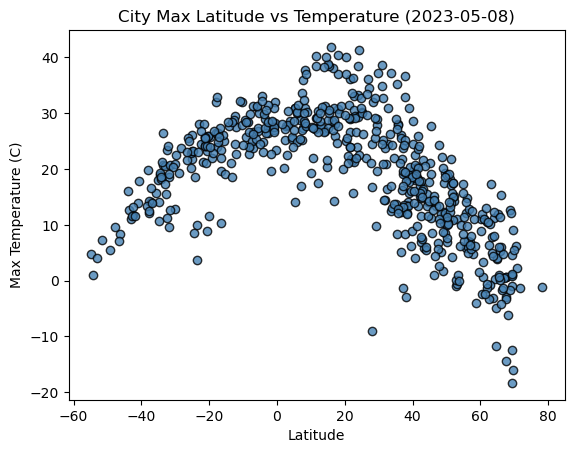

In [10]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df['Lat']
temps = city_data_df['Max Temp']

plot1 = plt.scatter(lats, temps, facecolors="steelblue", alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature (2023-05-08)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

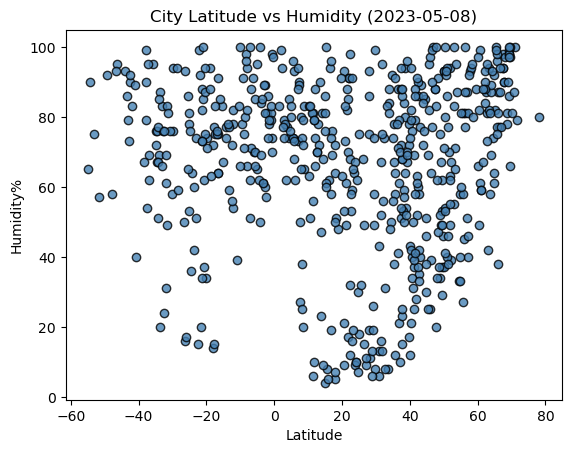

In [11]:
# Build scatter plot for latitude vs. humidity
lats = city_data_df['Lat']
humidity = city_data_df['Humidity']

plot1 = plt.scatter(lats, humidity, facecolors="steelblue", alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.title('City Latitude vs Humidity (2023-05-08)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

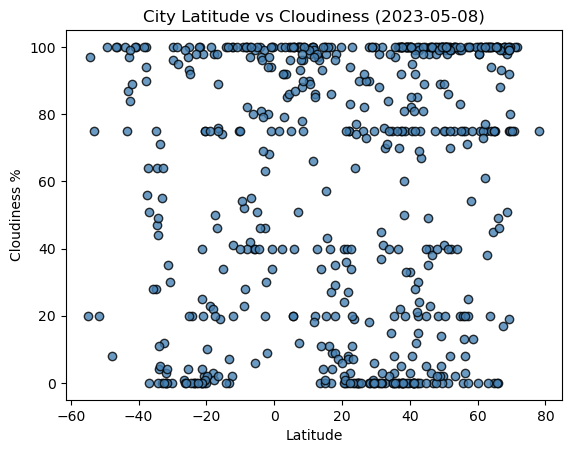

In [12]:
# Build scatter plot for latitude vs. cloudiness
lats = city_data_df['Lat']
clouds = city_data_df['Cloudiness']

plot1 = plt.scatter(lats, clouds, facecolors="steelblue", alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs Cloudiness (2023-05-08)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

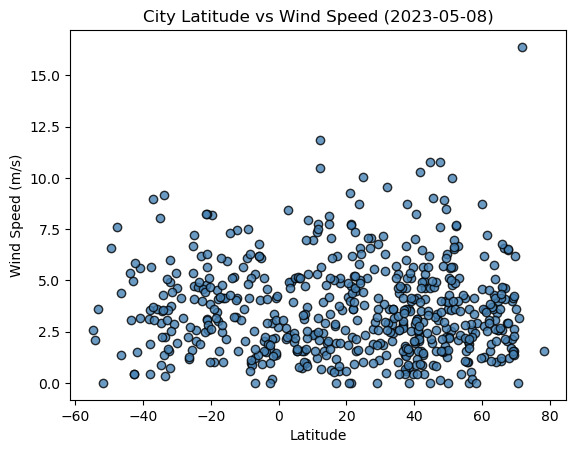

In [13]:
# Build the scatter plots for latitude vs. wind speed
lats = city_data_df['Lat']
speed = city_data_df['Wind Speed']

plot1 = plt.scatter(lats, speed, facecolors="steelblue", alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2023-05-08)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
def linear_reg(x,y,x_coord,y_coord):
    (slope, intercept, rval, p_val, stderr) = linregress(x,y)
    reg = x * slope + intercept
    line_display = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, reg, "r-")
    plt.annotate(line_display, (x_coord,y_coord),fontsize=10,color="r")
    print(f"The r-value is: {rval**2}")
    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df.loc[city_data_df["Lat"] >= 0]
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,17.38,58,20,4.12,GB,1683644734
4,bethel,41.3712,-73.4140,18.43,37,0,2.06,US,1683644735
6,albany,42.6001,-73.9662,14.75,35,100,1.34,US,1683644447
7,vorkuta,67.5000,64.0000,-2.94,94,99,2.91,RU,1683644736
10,jamestown,42.0970,-79.2353,16.96,52,0,1.54,US,1683644471


In [62]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[city_data_df["Lat"] < 0]
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.48,92,100,6.57,TF,1683644734
2,margaret river,-33.9500,115.0667,18.73,69,4,9.17,AU,1683644735
3,blackmans bay,-43.0167,147.3167,10.96,79,87,4.98,AU,1683644735
5,grytviken,-54.2811,-36.5092,1.04,90,97,2.07,GS,1683644736
8,waitangi,-43.9535,-176.5597,16.01,93,100,5.36,NZ,1683644736


###  Temperature vs. Latitude Linear Regression Plot

In [64]:
latcount = north_hem_df['Lat']
maxcount = north_hem_df['Max Temp']

print(latcount)
print(maxcount)

City_ID
0      54.8680
4      41.3712
6      42.6001
7      67.5000
10     42.0970
        ...   
580    22.4500
581    27.9233
582     1.4190
583     5.4002
584     8.4596
Name: Lat, Length: 417, dtype: float64
City_ID
0      17.38
4      18.43
6      14.75
7      -2.94
10     16.96
       ...  
580    36.34
581    16.72
582    28.05
583    14.05
584    37.00
Name: Max Temp, Length: 417, dtype: float64


The r-value is: 0.6291148612047192


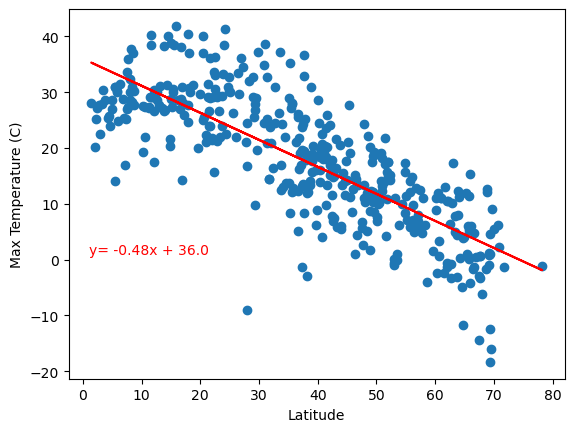

In [72]:
# Linear regression on Northern Hemisphere
x_axis = north_hem_df['Lat']
y_axis = north_hem_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
linear_reg(x_axis, y_axis,1,1)

The r-value is: 0.6170867071297137


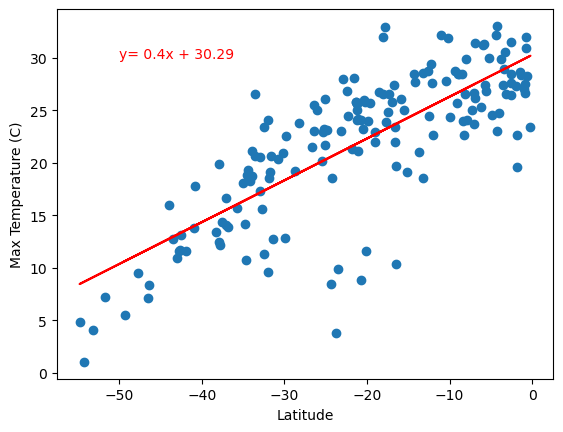

In [74]:
# Linear regression on Southern Hemisphere
x_axis = south_hem_df['Lat']
y_axis = south_hem_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
linear_reg(x_axis, y_axis,-50,30)

**Discussion about the linear relationship:** <br>The data shows there is a correleation between temperature and latitude
 - Northern Hemisphere: As cities' latitude get go up further from zero(0), the max temperatures get lower.
 - Southern Hemisphere: As cities' latitude get closer to zero (0), the max temperatures get higher.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04820249551752778


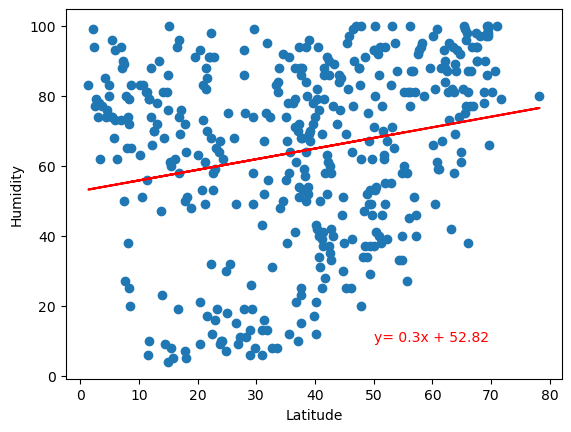

In [76]:
# Northern Hemisphere
x_axis = north_hem_df['Lat']
y_axis = north_hem_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_reg(x_axis, y_axis,50,10)

The r-value is: 0.003762782040942912


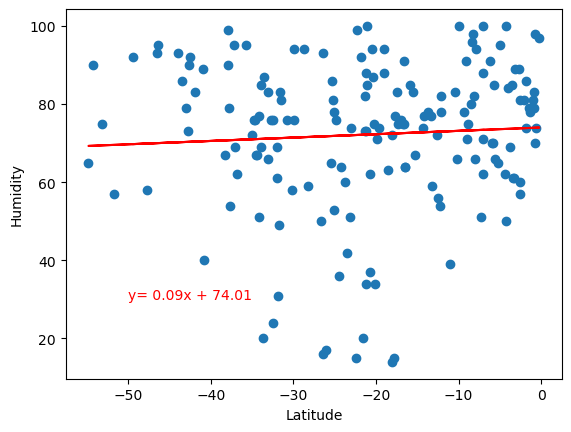

In [82]:
# Southern Hemisphere
x_axis = south_hem_df['Lat']
y_axis = south_hem_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_reg(x_axis, y_axis,-50,30)

**Discussion about the linear relationship:** <br>
The data shows no correlation between Humidity and Latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008501959401965062


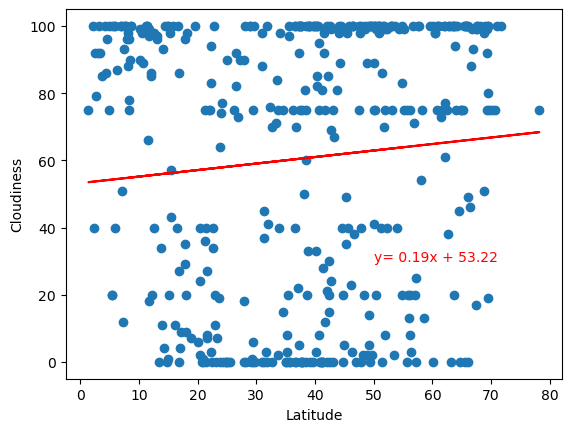

In [79]:
# Northern Hemisphere
x_axis = north_hem_df['Lat']
y_axis = north_hem_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linear_reg(x_axis, y_axis,50,30)

The r-value is: 0.006993617543706529


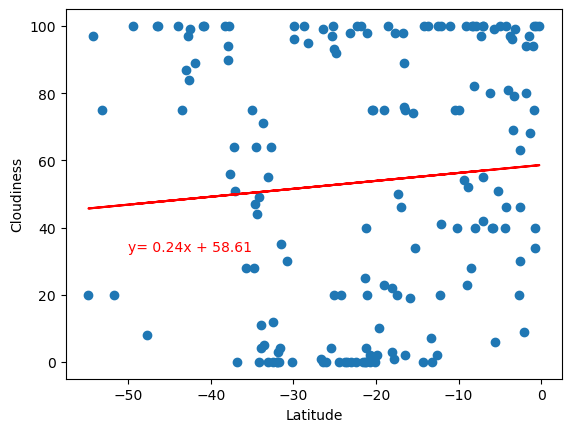

In [84]:
# Southern Hemisphere
x_axis = south_hem_df['Lat']
y_axis = south_hem_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linear_reg(x_axis, y_axis,-50,33)

**Discussion about the linear relationship:** <br>
The data shows no correlation between Cloudinessand Latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0012684702127125018


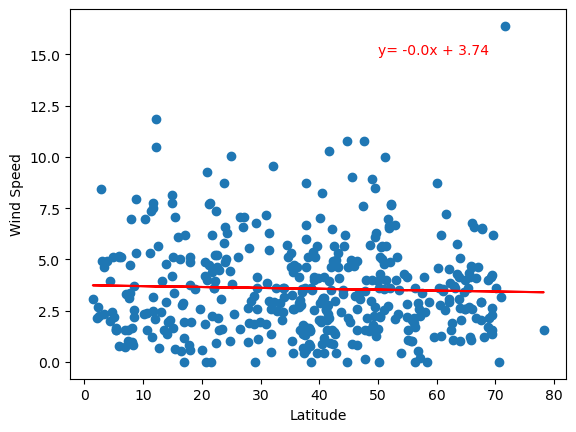

In [81]:
# Northern Hemisphere
x_axis = north_hem_df['Lat']
y_axis = north_hem_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linear_reg(x_axis, y_axis,50,15)

The r-value is: 0.007099079066645966


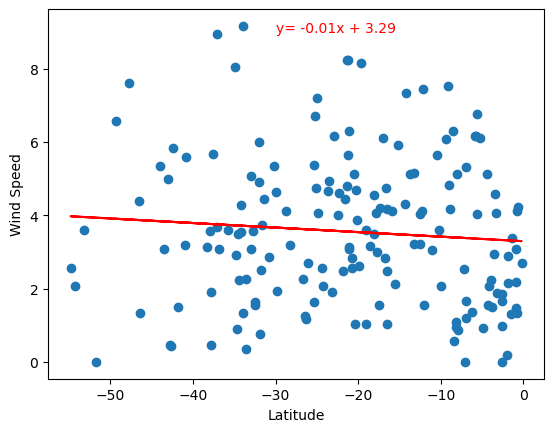

In [87]:
# Southern Hemisphere
x_axis = south_hem_df['Lat']
y_axis = south_hem_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linear_reg(x_axis, y_axis,-30,9)

**Discussion about the linear relationship:** <br>
The data shows no correlation between Wind Speed and Latitude